To build an ML model and predict the sales of each product from each outlet. The participants also need to use the model to analyse the properties of the product in the stores and find ways to increase sales.

Data attributes: 
Item_ID: Item Identification Number
Item_W: Item Weight
Item_Type: Item
Item_MRP: MRP of the Product
Outlet_ID: Outlet ID
Outlet_Year: Outlet Establishment year
Outlet_Size: Size of the outlet
Outlet_Type: Type of the outlet
Sales: Total sales from the outle

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [4]:
test.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3


In [5]:
train.shape,test.shape

((87864, 9), (37656, 8))

In [6]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

Item_ID                 0.0
Item_W                  0.0
Item_Type               0.0
Item_MRP                0.0
Outlet_ID               0.0
Outlet_Year             0.0
Outlet_Size             0.0
Outlet_Location_Type    0.0
Sales                   0.0
dtype: float64

In [7]:
#ratio of null values
test.isnull().sum()/train.shape[0] *100

Item_ID                 0.0
Item_W                  0.0
Item_Type               0.0
Item_MRP                0.0
Outlet_ID               0.0
Outlet_Year             0.0
Outlet_Size             0.0
Outlet_Location_Type    0.0
dtype: float64

In [8]:
train.dtypes

Item_ID                  object
Item_W                  float64
Item_Type                object
Item_MRP                float64
Outlet_ID                object
Outlet_Year               int64
Outlet_Size              object
Outlet_Location_Type     object
Sales                   float64
dtype: object

In [9]:
test.dtypes

Item_ID                  object
Item_W                  float64
Item_Type                object
Item_MRP                float64
Outlet_ID                object
Outlet_Year               int64
Outlet_Size              object
Outlet_Location_Type     object
dtype: object

# Data Cleaning

Why missing values treatment is required? Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction.

In [10]:
train.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [11]:
test.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
dtype: int64

In [12]:
train.drop(columns=['Item_ID'],axis = 1,inplace = True)

In [13]:
train.groupby('Item_Type')['Item_MRP','Item_W'].mean()

<ipython-input-13-afa1baf55959>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('Item_Type')['Item_MRP','Item_W'].mean()


,Item_MRP,Item_W
Item_Type,,
Baking Goods,150.702459,15.053796
Breads,147.199312,15.270986
Breakfast,156.858735,16.637266
Canned,153.352637,16.179592
Dairy,155.376347,16.564873
Frozen Foods,154.739848,16.436911
Fruits and Vegetables,147.637898,15.340384
Hard Drinks,151.503811,14.901788
Health and Hygiene,154.309473,16.252626


In [14]:
train.groupby(['Outlet_Size','Outlet_Location_Type'])['Sales'].count()

Outlet_Size  Outlet_Location_Type
High         Tier 1                   3807
             Tier 2                   3059
             Tier 3                   5701
Medium       Tier 1                   4995
             Tier 2                   3417
             Tier 3                  18271
Small        Tier 1                  24765
             Tier 2                  18777
             Tier 3                   5072
Name: Sales, dtype: int64

<AxesSubplot:>

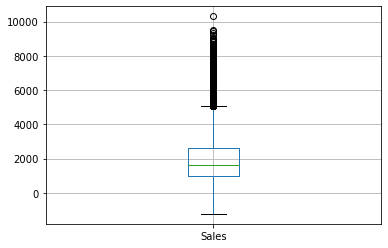

In [15]:
train.boxplot(column = 'Sales')

In [16]:
q1 = train.quantile(q = 0.25)
q3 = train.quantile(q = 0.75)
iqr = q3 - q1
print('IQR for train :',iqr)

IQR for train : Item_W            9.001278
Item_MRP         84.687030
Outlet_Year       7.000000
Sales          1648.808061
dtype: float64


In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [18]:
lowprice,uppprice = remove_outlier(train['Sales'])
train['Sales']=np.where(train['Sales']>uppprice,uppprice,train['Sales'])
train['Sales']=np.where(train['Sales']<lowprice,lowprice,train['Sales'])

In [19]:
lowprice,uppprice = remove_outlier(train['Item_MRP'])
train['Item_MRP']=np.where(train['Item_MRP']>uppprice,uppprice,train['Item_MRP'])
train['Item_MRP']=np.where(train['Item_MRP']<lowprice,lowprice,train['Item_MRP'])

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [21]:
#df_train=train.drop('#Order',axis=1)
X=train.iloc[:,0:8].values

In [22]:
y=train.iloc[:,-1].values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)#,random_state=7)

In [25]:
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
def backward_elimination(train, target,significance_level = 0.05):
    features = train.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(train[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

features = backward_elimination(X_train,y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
features = list(set(features))

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
svr = SVR(kernel = 'rbf')

In [ ]:
lr.fit(X_train[features],y_train)

In [ ]:
y_pred = lr.predict(X_val[features])

Encoding the required columns from training and test dataset

In [ ]:
train.dtypes

In [ ]:
test.dtypes

In [ ]:
train.head()

In [ ]:
train.iloc[:,0:8]

In [ ]:
train.iloc[:,-1]

from sklearn import metrics
from sklearn.linear_model import LinearRegression

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)


y_pred =  LR.predict(X_test)
y_pred

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.metrics import mean_squared_error 
from math import sqrt
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
from sklearn import neighbors

In [ ]:
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

As we discussed, when we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. 

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

In [ ]:
pred=regressor.predict(X_test)